In [ ]:
!pip install rdkit-pypi
'''
Plotting libraries
'''
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

'''
What we'll need for analysis, clustering, etc.
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets, decomposition
from sklearn.manifold import TSNE

'''
Of course the powerful RDKIT for cheminformatics <3
'''
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.Draw import IPythonConsole

'''
Some utilities
'''
!pip uninstall progressbar
!pip install progressbar2
import progressbar
from math import pi

%config Completer.use_jedi = False
PandasTools.RenderImagesInAllDataFrames(images=True)

In [2]:
mols=Chem.SDMolSupplier('pak1ligands.sdf')
print (len(mols)) #To check how many molecules there are in the file

1741


In [3]:
bar=progressbar.ProgressBar(max_value=len(mols))
table=pd.DataFrame()
for i,mol in enumerate(mols):
    Chem.SanitizeMol(mol)
    table.loc[i,'smiles']=Chem.MolToSmiles(mol)
    table.loc[i,'Mol']=mol
    table.loc[i,'MolWt']=Descriptors.MolWt(mol)
    table.loc[i,'LogP']=Descriptors.MolLogP(mol)
    table.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    table.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    table.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    table.loc[i,'NumRotatableBonds']=Descriptors.NumRotatableBonds(mol)
    table.loc[i,'NumHeavyAtoms']=Descriptors.HeavyAtomCount (mol)
    table.loc[i,'NumAliphaticCarbocycles']=Descriptors.NumAliphaticCarbocycles(mol)
    table.loc[i,'NumAliphaticHeterocycles']=Descriptors.NumAliphaticHeterocycles(mol)
    table.loc[i,'NumAliphaticRings']=Descriptors.NumAliphaticRings(mol)
    table.loc[i,'NumAromaticCarbocycles']=Descriptors.NumAromaticCarbocycles(mol)
    table.loc[i,'NumAromaticHeterocycles']=Descriptors.NumAromaticHeterocycles(mol)
    table.loc[i,'NumAromaticRings']=Descriptors.NumAromaticRings(mol)
    table.loc[i,'RingCount']=Descriptors.RingCount(mol)
    table.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    
    table.loc[i,'TPSA']=Descriptors.TPSA(mol)
    table.loc[i,'NPR1']=rdMolDescriptors.CalcNPR1(mol)
    table.loc[i,'NPR2']=rdMolDescriptors.CalcNPR2(mol)
    table.loc[i,'InertialShapeFactor']=Descriptors3D.InertialShapeFactor(mol)
    table.loc[i,'RadiusOfGyration']=Descriptors3D.RadiusOfGyration(mol)
    bar.update(i+1)

100% (1741 of 1741) |####################| Elapsed Time: 0:00:04 ETA:  00:00:00

,smiles,Mol,MolWt,LogP,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumHeavyAtoms,NumAliphaticCarbocycles,...,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,RingCount,FractionCSP3,TPSA,NPR1,NPR2,InertialShapeFactor,RadiusOfGyration
0,Cc1nc2ccc(C#CC(C)(C)O)cc2n1-c1ncnc(N)n1,,308.345,1.22352,7.0,2.0,7.0,1.0,23.0,0.0,...,1.0,2.0,3.0,3.0,0.250000,102.74,0.224199,0.775801,0.001382,2.927312
1,Cc1n[nH]c2sc(C(=O)NCCc3ccc(Cl)cc3)cc12,,319.817,3.55872,3.0,2.0,6.0,4.0,21.0,0.0,...,1.0,2.0,3.0,3.0,0.200000,57.78,0.058657,0.941343,0.004799,3.307358
2,Cn1c2ccccc2c2c3c(c4c5ccccc5n(CCC#N)c4c21)CNC3=O,,378.435,4.59648,4.0,1.0,5.0,2.0,29.0,0.0,...,3.0,2.0,5.0,6.0,0.166667,62.75,0.448722,0.551278,0.000458,2.729462
3,CCCC(=O)Nc1n[nH]c2ccc(-c3cn(Cc4ccccc4)nn3)cc12,,360.421,3.60830,5.0,2.0,7.0,6.0,27.0,0.0,...,2.0,2.0,4.0,4.0,0.200000,88.49,0.182743,0.817257,0.001328,3.146217
4,COCCn1cc(-c2ccncn2)c(-c2ccc(Cl)cc2)n1,,314.776,3.30690,5.0,0.0,6.0,5.0,22.0,0.0,...,1.0,2.0,3.0,3.0,0.187500,52.83,0.317235,0.682765,0.000931,2.777592

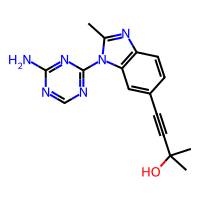
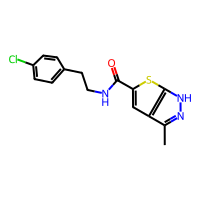
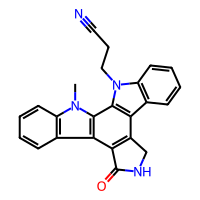
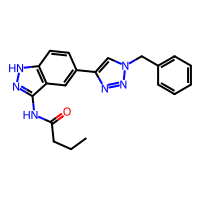
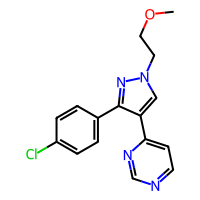

In [4]:
table.head(5) #Let's take a look to the table

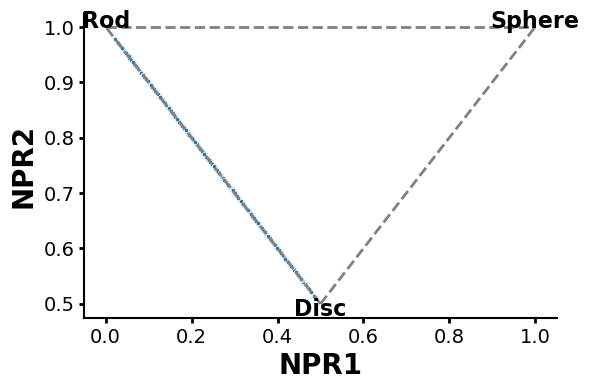

In [5]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(6,4))

ax=sns.scatterplot(x='NPR1',y='NPR2',data=table,s=10,linewidth=0.5,alpha=1)
x1, y1 = [0.5, 0], [0.5, 1]
x2, y2 = [0.5, 1], [0.5, 1]
x3, y3 = [0,1],[1,1]

plt.plot(x1, y1,x2,y2,x3,y3,c='gray',ls='--',lw=2)

plt.xlabel ('NPR1',fontsize=20,fontweight='bold')

plt.ylabel ('NPR2',fontsize=20,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(0, 1.01,s='Rod',fontsize=16,horizontalalignment='center',verticalalignment='center',fontweight='bold')
plt.text(1, 1.01,s='Sphere',fontsize=16,horizontalalignment='center',verticalalignment='center',fontweight='bold')
plt.text(0.5, 0.49,s='Disc',fontsize=16,horizontalalignment='center',verticalalignment='center',fontweight='bold')

plt.tick_params ('both',width=2,labelsize=14)
plt.tight_layout()

plt.show()

In [6]:
descriptors = table[['MolWt', 'LogP','NumHeteroatoms','RingCount','FractionCSP3', 'TPSA','RadiusOfGyration']].values #The non-redundant molecular descriptors chosen for PCA
descriptors_std = StandardScaler().fit_transform(descriptors) #Important to avoid scaling problems between our different descriptors
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)
descriptors_pca= pd.DataFrame(descriptors_2d) # Saving PCA values to a new table
descriptors_pca.index = table.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(5) #Displays the PCA table
print(pca.explained_variance_ratio_) #Let's plot PC1 vs PC2 
print(sum(pca.explained_variance_ratio_))

[0.52135476 0.22177648 0.12578764 0.06757182 0.03537498 0.01748602
 0.0106483 ]
1.0000000000000002


In [7]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
#The normalization is to plot PCA values in 0-1 sacle and include the vectors (features to the plot)

scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1'])) 
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

In [8]:
descriptors_pca.head(5) # The PCA table now has the normalized PC1 and PC2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC1_normalized,PC2_normalized
0,-1.185017,1.960708,0.279243,0.053832,0.432509,0.021763,0.014827,-0.034830,0.166059
1,-1.530899,0.025820,0.008510,-0.735812,0.452716,-0.323113,-0.066540,-0.044996,0.002187
2,-0.702145,-1.501850,-1.024478,1.555966,-0.009679,0.337246,0.158766,-0.020638,-0.127197
3,-0.583906,0.044844,-0.004796,0.111486,0.110310,0.188355,-0.066250,-0.017162,0.003798
4,-1.948001,0.191721,-0.029334,-0.420598,0.003396,-0.386031,0.049116,-0.057256,0.016237


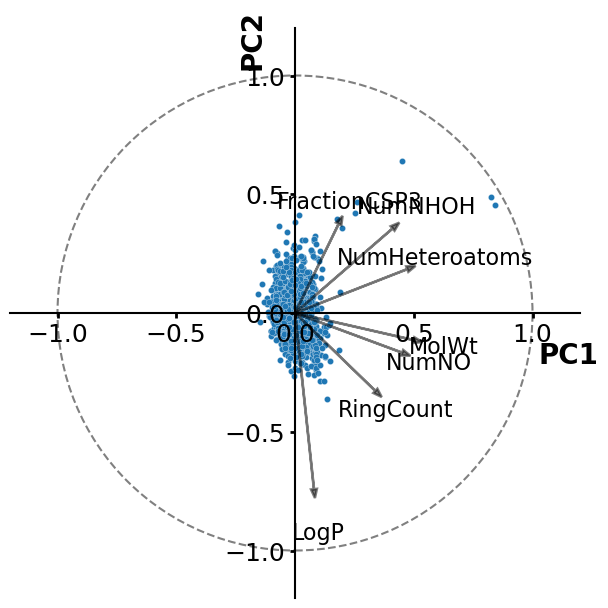

In [9]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(6,6))

ax=sns.scatterplot(x='PC1_normalized',y='PC2_normalized',data=descriptors_pca,s=20,palette=sns.color_palette("Set2", 3),linewidth=0.2,alpha=1)

plt.xlabel ('PC1',fontsize=20,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=20,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


lab=['MolWt', 'LogP','NumHeteroatoms','RingCount','FractionCSP3', 
     'NumNHOH', 'NumNO', 'TPSA','PBF',
     'InertialShapeFactor','RadiusOfGyration'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.5,linewidth=1.8,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=16)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')

plt.tick_params ('both',width=2,labelsize=18)

ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()

In [10]:
smiles = list(table["smiles"])
smi=[Chem.MolFromSmiles(x) for x in smiles]
fps =  [MACCSkeys.GenMACCSKeys(x) for x in smi] # In this example I'll use MACCSKeys
tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(fps) #This compute a similartity matrix between all the molecules
n_mol = len(fps)
similarity_matrix = np.ones([n_mol,n_mol])
i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
distance_matrix = np.subtract(1,similarity_matrix) #This is the similarity matrix of all vs all molecules in our table

In [11]:
TSNE_sim = TSNE(n_components=2,init='pca',random_state=90, angle = 0.3,perplexity=50).fit_transform(distance_matrix) #Remember to always tune the parameters acording your dataset!!
tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) # New table containing the tSNE results
tsne_result.head(5) #A new table containing the tSNE results

C:\Users\91830\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,TC1,TC2
0,-8.731631,-15.154045
1,22.851538,-17.976349
2,-12.528208,10.292006
3,0.238333,-23.878792
4,-21.669441,-4.520327


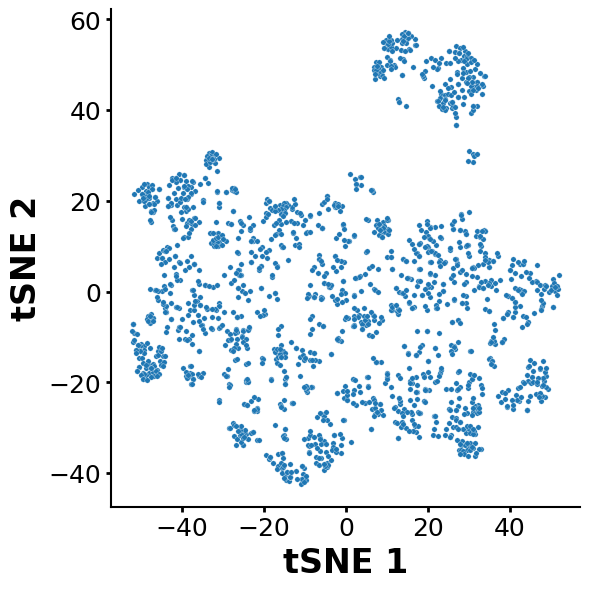

In [12]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(6,6))

ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result,s=15,linewidth=0.2,alpha=1)
        

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()

#ax.legend(handles=handles[1:], labels=labels[1:])

#plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

plt.tight_layout()
plt.show()

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,14, 16] # To explore the "best" number of cluster to clasify our molecules
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne_result[['TC1','TC2']])
    silhouette_avg = silhouette_score(tsne_result[['TC1','TC1']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) #This will print the silhouette score, as higher as our data is better distributed inside the clusters

For n_clusters = 2 The average silhouette_score is : 0.63711035
For n_clusters = 3 The average silhouette_score is : 0.22392642
For n_clusters = 4 The average silhouette_score is : 0.17752029
For n_clusters = 5 The average silhouette_score is : 0.1417312
For n_clusters = 6 The average silhouette_score is : -0.00058439147
For n_clusters = 7 The average silhouette_score is : -0.022958526
For n_clusters = 8 The average silhouette_score is : 0.060149807
For n_clusters = 9 The average silhouette_score is : 0.022912953
For n_clusters = 10 The average silhouette_score is : -0.046956114
For n_clusters = 11 The average silhouette_score is : -0.044179518
For n_clusters = 12 The average silhouette_score is : -0.057068247
For n_clusters = 14 The average silhouette_score is : -0.077612534
For n_clusters = 16 The average silhouette_score is : -0.0973379


In [14]:
kmeans = KMeans(n_clusters=2, random_state=10) # We define the best number of clusters (6)
clusters = kmeans.fit(tsne_result[['TC1','TC2']]) #TC1vs TC2

tsne_result['Cluster'] = pd.Series(clusters.labels_, index=tsne_result.index)
tsne_result.head(5) #The tSNE table now contains the numer of cluster for each element

,TC1,TC2,Cluster
0,-8.731631,-15.154045,0
1,22.851538,-17.976349,1
2,-12.528208,10.292006,0
3,0.238333,-23.878792,0
4,-21.669441,-4.520327,0


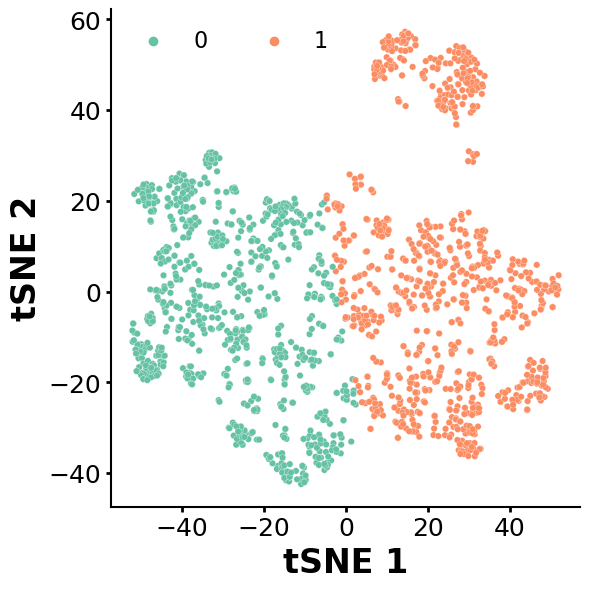

In [15]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(6,6))

ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result, hue='Cluster',s=22,palette=sns.color_palette("Set2", 2),linewidth=0.2,alpha=1)
        

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[1:], labels=labels[1:])

plt.legend(loc='best',frameon=False,prop={'size': 16},ncol=2)

plt.tight_layout()
plt.show()

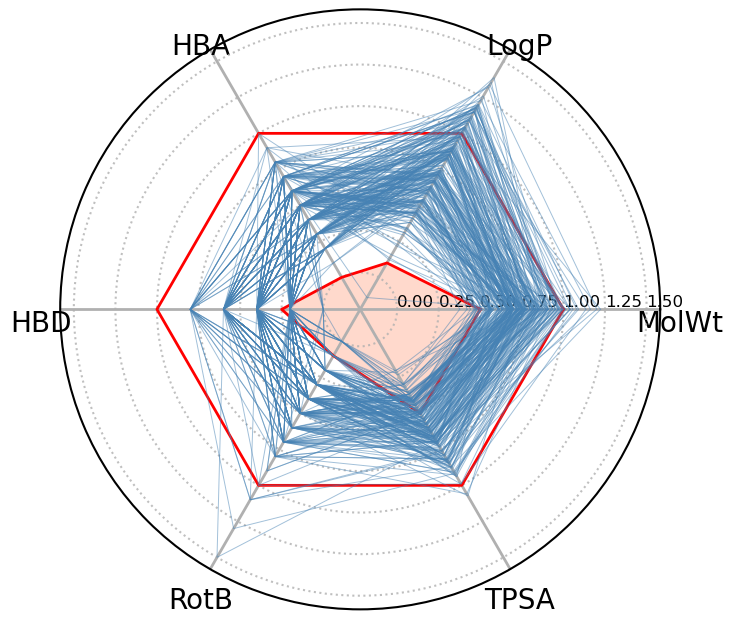

In [16]:
data=pd.DataFrame() # I'll create a new table containing the normalized bRo5 values of our compounds

data['MolWt']=[i/500 for i in table['MolWt']]
data['LogP']=[i/5 for i in table['LogP']]
data['HBA']=[i/10 for i in table['NumHAcceptors']]
data['HBD']=[i/5 for i in table['NumHDonors']]
data['RotB']=[i/10 for i in table['NumRotatableBonds']]
data['TPSA']=[i/140 for i in table['TPSA']]

categories=list(data.columns)  # This will set up the parameters for the angles of the radar plot. 
N = len(categories)
values=data[categories].values[0]
values=np.append(values,values[:1])
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

Ro5_up=[1,1,1,1,1,1,1] #The upper limit for bRo5
Ro5_low=[0.5,0.1,0,0.25,0.1,0.5,0.5]  #The lower limit for bRo5

fig=plt.figure(figsize=(6,6))

ax = fig.add_axes([1, 1, 1, 1],projection='polar')

plt.xticks(angles[:-1], categories,color='k',size=20,ha='center',va='top',fontweight='book')

plt.tick_params(axis='y',width=4,labelsize=12, grid_alpha=0.05)

ax.set_rlabel_position(0)

ax.plot(angles, Ro5_up, linewidth=2, linestyle='-',color='red')
ax.plot(angles, Ro5_low, linewidth=2, linestyle='-',color='red')

#ax.fill(angles, Ro5_up, 'red', alpha=0.2)
ax.fill(angles, Ro5_low, 'orangered', alpha=0.2)

for i in data.index[:250]: #I'll just show the profile for the first 250 molecules in the table for clarity of the plot
    values=data[categories].values[i]
    values=np.append(values,values[:1])
    ax.plot(angles, values, linewidth=0.7 ,color='steelblue',alpha=0.5)
    #ax.fill(angles, values, 'C2', alpha=0.025)

ax.grid(axis='y',linewidth=1.5,linestyle='dotted',alpha=0.8)
ax.grid(axis='x',linewidth=2,linestyle='-',alpha=1)

plt.show()

